<a href="https://colab.research.google.com/github/Real1CM/MLassignment/blob/main/%E4%BD%9C%E4%B8%9A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 作业1 矩阵读写

In [2]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [13]:
import torch
import numpy as np
import struct

matrix = np.array([[1, 2, 3], [4, 5, 6]])

np.savetxt('matrix.txt', matrix)

loaded_matrix_txt = np.loadtxt('matrix.txt')

print("从 .txt 文件读取的矩阵：")
print(loaded_matrix_txt)


从 .txt 文件读取的矩阵：
[[1. 2. 3.]
 [4. 5. 6.]]


###### 运行上述代码，在content文件中生成了matricx.txt这个文件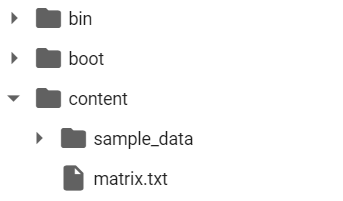

In [25]:
import numpy as np
import struct
#用python列表生成元素序列，再转为numpy定义的矩阵类型numpy.ndarray
def createMatrixList(num, rows, cols):
    matrix_list = []
    for i in range(num):
        matrix = []
        for j in range(rows * cols):
            matrix.append((i + 1) * 10 + (j + 1))
        matrix = np.reshape(matrix, (rows, cols))
        matrix_list.append(matrix)
    matrix_list = np.array(matrix_list, dtype='ubyte')
    return matrix_list


def createMatrix(num: int, rows: int, cols: int) -> np.ndarray:
    matrix_list = np.zeros((num, rows, cols), 'uint8')
    for i in range(num):
        matrix = np.arange(1, rows * cols + 1).astype('ubyte')
        matrix += (i + 1) * 10
        matrix_list[i] = matrix.reshape((rows, cols))
    return matrix_list

if __name__ == '__main__':
    matrix_list = createMatrixList(5, 2, 3)
    print(type(matrix_list), '\n', matrix_list.dtype, '\n', matrix_list)
    matrix_list = createMatrix(5, 2, 3)
    print(type(matrix_list), '\n', matrix_list.dtype, '\n', matrix_list)

<class 'numpy.ndarray'> 
 uint8 
 [[[11 12 13]
  [14 15 16]]

 [[21 22 23]
  [24 25 26]]

 [[31 32 33]
  [34 35 36]]

 [[41 42 43]
  [44 45 46]]

 [[51 52 53]
  [54 55 56]]]
<class 'numpy.ndarray'> 
 uint8 
 [[[11 12 13]
  [14 15 16]]

 [[21 22 23]
  [24 25 26]]

 [[31 32 33]
  [34 35 36]]

 [[41 42 43]
  [44 45 46]]

 [[51 52 53]
  [54 55 56]]]


In [30]:
import numpy as np
import struct

# ... (createMatrix and createMatrixList functions remain unchanged) ...

def writeMatrixToFile(filename, matrix_list):
    with open(filename, 'wb') as f:
        shapes = matrix_list.shape

        # Write header: magic number, data type, number of dimensions
        file_head_fmt = '>HBB'  # > for big-endian, H for unsigned short, B for unsigned char
        file_head = struct.pack(file_head_fmt, 0, 8, len(shapes)) # 0 is magic number, 8 is data type (uint8), len(shapes) is num of dims
        f.write(file_head)

        # Write shape of the matrix
        file_head_fmt = '>I'  # > for big-endian, I for unsigned int
        for i in shapes:
            file_head = struct.pack(file_head_fmt, i)
            f.write(file_head)

        # Write the matrix data
        f.write(matrix_list.tobytes())  # Convert matrix to bytes before writing



def readMatrixFromFile(filename):
    with open(filename, 'rb') as f:
        data_buf = f.read()
        off_set = 0

        # Read header
        file_head_fmt = '>HBB'
        _, _, dimslen = struct.unpack_from(file_head_fmt, data_buf, off_set)
        off_set += struct.calcsize(file_head_fmt)

        # Read shape of the matrix
        file_head_fmt = '>{}I'.format(dimslen)
        shapes = struct.unpack_from(file_head_fmt, data_buf, off_set)
        off_set += struct.calcsize(file_head_fmt)

        # Read the matrix data
        data_size = np.prod(shapes)  # Calculate total number of elements
        data_fmt = '>' + str(data_size) + 'B'  # Format string for reading data
        matrix_list = struct.unpack_from(data_fmt, data_buf, off_set)

        # Reshape and convert to uint8
        matrix_list = np.reshape(matrix_list, shapes).astype('uint8')

    return matrix_list

if __name__ == '__main__':
    matrix_list = createMatrix(num=20, rows=2, cols=3)
    writeMatrixToFile('./data.idx3.ubyte', matrix_list)
    matrix_list = readMatrixFromFile('./data.idx3.ubyte')

    print(matrix_list, '\n', type(matrix_list), '\n', matrix_list.dtype)

[[[ 11  12  13]
  [ 14  15  16]]

 [[ 21  22  23]
  [ 24  25  26]]

 [[ 31  32  33]
  [ 34  35  36]]

 [[ 41  42  43]
  [ 44  45  46]]

 [[ 51  52  53]
  [ 54  55  56]]

 [[ 61  62  63]
  [ 64  65  66]]

 [[ 71  72  73]
  [ 74  75  76]]

 [[ 81  82  83]
  [ 84  85  86]]

 [[ 91  92  93]
  [ 94  95  96]]

 [[101 102 103]
  [104 105 106]]

 [[111 112 113]
  [114 115 116]]

 [[121 122 123]
  [124 125 126]]

 [[131 132 133]
  [134 135 136]]

 [[141 142 143]
  [144 145 146]]

 [[151 152 153]
  [154 155 156]]

 [[161 162 163]
  [164 165 166]]

 [[171 172 173]
  [174 175 176]]

 [[181 182 183]
  [184 185 186]]

 [[191 192 193]
  [194 195 196]]

 [[201 202 203]
  [204 205 206]]] 
 <class 'numpy.ndarray'> 
 uint8


In [31]:
import numpy as np
import struct

# ... (createMatrix and createMatrixList functions remain unchanged) ...

def writeMatrixToFile(filename, matrix_list):
    with open(filename, 'wb') as f:
        shapes = matrix_list.shape

        # Write header: magic number, data type, number of dimensions
        file_head_fmt = '>HBB'  # > for big-endian, H for unsigned short, B for unsigned char
        file_head = struct.pack(file_head_fmt, 0, 8, len(shapes)) # 0 is magic number, 8 is data type (uint8), len(shapes) is num of dims
        f.write(file_head)

        # Write shape of the matrix
        file_head_fmt = '>I'  # > for big-endian, I for unsigned int
        for i in shapes:
            file_head = struct.pack(file_head_fmt, i)
            f.write(file_head)

        # Write the matrix data
        f.write(matrix_list.tobytes())  # Convert matrix to bytes before writing



def readMatrixFromFile(filename):
    with open(filename, 'rb') as f:
        data_buf = f.read()
        off_set = 0

        # Read header
        file_head_fmt = '>HBB'
        _, _, dimslen = struct.unpack_from(file_head_fmt, data_buf, off_set)
        off_set += struct.calcsize(file_head_fmt)

        # Read shape of the matrix
        file_head_fmt = '>{}I'.format(dimslen)
        shapes = struct.unpack_from(file_head_fmt, data_buf, off_set)
        off_set += struct.calcsize(file_head_fmt)

        # Read the matrix data
        data_size = np.prod(shapes)  # Calculate total number of elements
        data_fmt = '>' + str(data_size) + 'B'  # Format string for reading data
        matrix_list = struct.unpack_from(data_fmt, data_buf, off_set)

        # Reshape and convert to uint8
        matrix_list = np.reshape(matrix_list, shapes).astype('uint8')

    return matrix_list

if __name__ == '__main__':
    matrix_list = createMatrix(num=20, rows=2, cols=3)
    writeMatrixToFile('./data.idx3.ubyte', matrix_list)
    matrix_list = readMatrixFromFile('./data.idx3.ubyte')

    print(matrix_list, '\n', type(matrix_list), '\n', matrix_list.dtype)

[[[ 11  12  13]
  [ 14  15  16]]

 [[ 21  22  23]
  [ 24  25  26]]

 [[ 31  32  33]
  [ 34  35  36]]

 [[ 41  42  43]
  [ 44  45  46]]

 [[ 51  52  53]
  [ 54  55  56]]

 [[ 61  62  63]
  [ 64  65  66]]

 [[ 71  72  73]
  [ 74  75  76]]

 [[ 81  82  83]
  [ 84  85  86]]

 [[ 91  92  93]
  [ 94  95  96]]

 [[101 102 103]
  [104 105 106]]

 [[111 112 113]
  [114 115 116]]

 [[121 122 123]
  [124 125 126]]

 [[131 132 133]
  [134 135 136]]

 [[141 142 143]
  [144 145 146]]

 [[151 152 153]
  [154 155 156]]

 [[161 162 163]
  [164 165 166]]

 [[171 172 173]
  [174 175 176]]

 [[181 182 183]
  [184 185 186]]

 [[191 192 193]
  [194 195 196]]

 [[201 202 203]
  [204 205 206]]] 
 <class 'numpy.ndarray'> 
 uint8


In [46]:
import os
import numpy as np
import struct

type2code_dict = {'uint8': 0x08, 'int8': 0x09, 'int16': 0x0B,
                    'int32': 0x0C, 'float32': 0x0D, 'float64': 0x0E}
code2type_dict = {0x08: 'B', 0x09: 'b', 0x0B: 'h', 0x0c: 'i', 0x0D: 'f', 0x0E: 'd'}
type2char_dict = {'uint8': 'B', 'int8': 'b', 'int16': 'h', 'int32': 'i', 'float32': 'f', 'float64': 'd'}


def createMatrix(num: int, rows: int, cols: int, elemtype: str = 'uint8') -> np.ndarray:
    matrix_list = np.zeros((num, rows, cols), elemtype)
    for i in range(num):
        matrix = np.arange(1, rows * cols + 1).astype(elemtype)
        matrix += (i + 1) * 10
        matrix_list[i] = matrix.reshape((rows, cols))
    return matrix_list


def writeMatrixToFile(filename, matrix_list):
    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as f:
        shape = matrix_list.shape
        elemnum = np.prod(shape)
        file_head_fmt = '>HBB'  # 格式定义，>表示高位在前，I表示4字节整数
        file_head = struct.pack(file_head_fmt, 0,
                                type2code_dict[matrix_list.dtype.name],
                                len(shape))
        f.write(file_head)

        file_head_fmt = '>I'
        for i in shape:
            file_head = struct.pack(file_head_fmt, i)
            f.write(file_head)
        matrix_list = struct.pack('>{}{}'.format(
            elemnum, type2char_dict[matrix_list.dtype.name]), *matrix_list.reshape(elemnum))

        f.write(matrix_list)


def readMatrixFromFile(filename):
    with open(filename, 'rb') as f:
        data_buf = f.read()
        off_set = 0
        file_head_fmt = '>HBB'  # 格式定义，>表示高位在前，I表示4字节整数
        _, dcode, dimslen = struct.unpack_from(
            file_head_fmt, data_buf, off_set)
        off_set += struct.calcsize(file_head_fmt)

        file_head_fmt = '>{}I'.format(dimslen)
        shape = struct.unpack_from(file_head_fmt, data_buf, off_set)
        off_set += struct.calcsize(file_head_fmt)

        data_fmt = '>' + str(np.prod(shape)) + code2type_dict[dcode]
        matrix_list = struct.unpack_from(data_fmt, data_buf, off_set)
        matrix_list = np.reshape(matrix_list, shape).astype(
            code2type_dict[dcode])
    return matrix_list


if __name__ == '__main__':
    matrix_list = createMatrix(num=5, rows=2, cols=3, elemtype='f4')
    print(matrix_list, '\n', type(matrix_list), '\n', matrix_list.dtype, matrix_list.dtype.name)
    writeMatrixToFile('data/data.idx3.float', matrix_list)
    matrix_list = readMatrixFromFile('data/data.idx3.float')
    print(matrix_list, '\n', type(matrix_list), '\n', matrix_list.dtype, matrix_list.dtype.name)

[[[11. 12. 13.]
  [14. 15. 16.]]

 [[21. 22. 23.]
  [24. 25. 26.]]

 [[31. 32. 33.]
  [34. 35. 36.]]

 [[41. 42. 43.]
  [44. 45. 46.]]

 [[51. 52. 53.]
  [54. 55. 56.]]] 
 <class 'numpy.ndarray'> 
 float32 float32
[[[11. 12. 13.]
  [14. 15. 16.]]

 [[21. 22. 23.]
  [24. 25. 26.]]

 [[31. 32. 33.]
  [34. 35. 36.]]

 [[41. 42. 43.]
  [44. 45. 46.]]

 [[51. 52. 53.]
  [54. 55. 56.]]] 
 <class 'numpy.ndarray'> 
 float32 float32


(10000, 28, 28) uint8


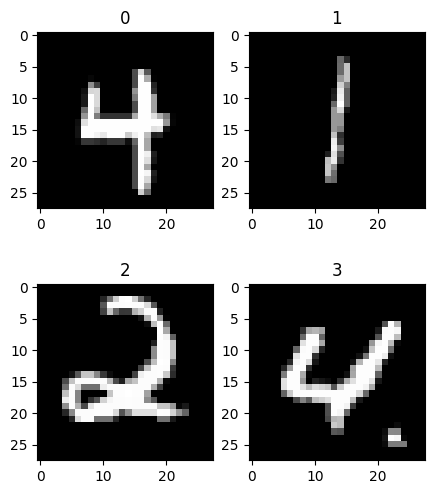

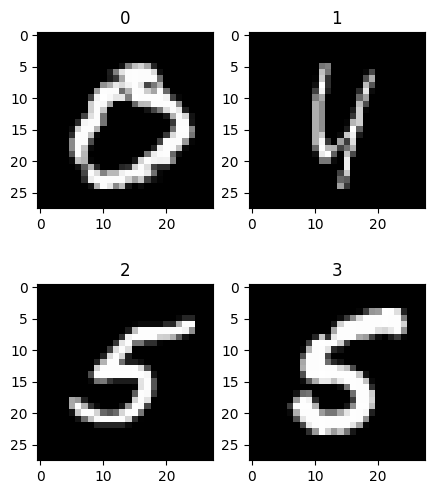

In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

def displayImages(imgs, titles, nrows=2, ncols=2):
    # 设定n*n排列方式，这里设置的是2*2，nrows行，ncols列，figsize设定窗口大小
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5, 6))
    for row in range(nrows):
        for col in range(ncols):
            axes[row, col].imshow(imgs[row * ncols + col], cmap=cm.gray)
            axes[row, col].set_title(titles[row * ncols + col])
plt.show()

def readMnistAndDisplay(mnist_filename):
    mnist = readMatrixFromFile(mnist_filename)
    print(mnist.shape, mnist.dtype)
    num, width, height = mnist.shape
    sample = list(range(num))
    random.shuffle(sample)
    displayImages(mnist[sample[0:4]], range(4))
    displayImages(mnist[sample[5:9]], range(4))

if __name__ == '__main__':
    readMnistAndDisplay('./t10k-images-idx3-ubyte')



In [42]:
def createMiniMNIST(mnist_filename, dst_dir):
    mnist = readMatrixFromFile(mnist_filename)

    num, width, height = mnist.shape
    top_mnist = np.zeros(mnist.shape, np.uint8)
    center_mnist = np.zeros(mnist.shape, np.uint8)
    bottom_mnist = np.zeros(mnist.shape, np.uint8)

    minw = width // 2
    minh = height // 2
    mini_mnist = mnist[:, ::2, ::2]
    top_mnist[:, :minw, :minh] = mini_mnist
    center_mnist[:, minw // 2:minw // 2 + minw, minh // 2:minh // 2 + minh] = mini_mnist
    bottom_mnist[:, minw:, minh:] = mini_mnist

    # 示例
    sample = random.randint(0, num - 1)
    displayImages([mnist[sample], top_mnist[sample],
                   center_mnist[sample], bottom_mnist[sample]],
                  ['raw', 'top', 'center', 'bottom'])
    sample = random.randint(0, num - 1)
    displayImages([mnist[sample], top_mnist[sample],
                   center_mnist[sample], bottom_mnist[sample]],
                  ['raw', 'top', 'center', 'bottom'])

    return top_mnist, center_mnist, bottom_mnist

    if __name__ == '__main__':
        dst_dir = 'data/'
        readMnistAndDisplay(dst_dir+'t10k-images-idx3-ubyte')
        top_mnist, center_mnist, bottom_mnist =createMiniMNIST(
        mnist_filename=dst_dir+'t10k-images-idx3-ubyte',
        dst_dir= dst_dir)
        writeMatrixToFile(dst_dir + 'top_t10k-images-idx3-ubyte', top_mnist)
        writeMatrixToFile(dst_dir + 'centre_t10k-images-idx3-ubyte', center_mnist)
        writeMatrixToFile(dst_dir + 'bottom_t10k-images-idx3-ubyte', bottom_mnist)

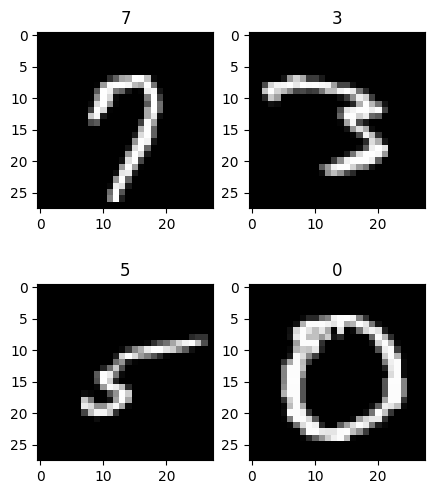

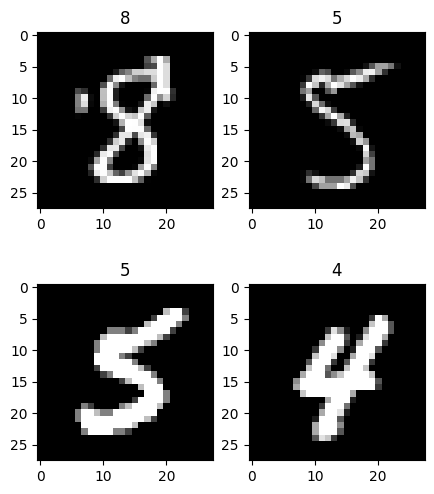

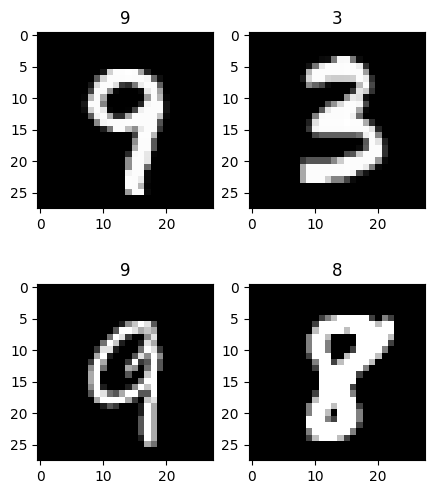

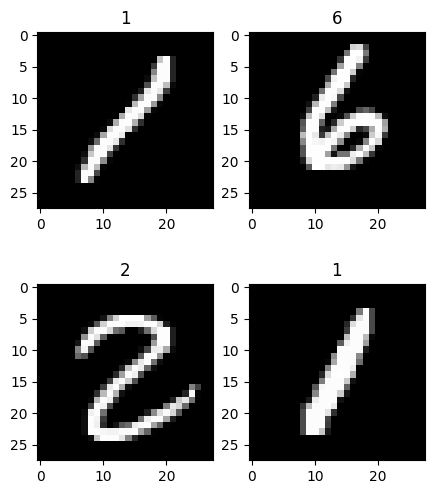

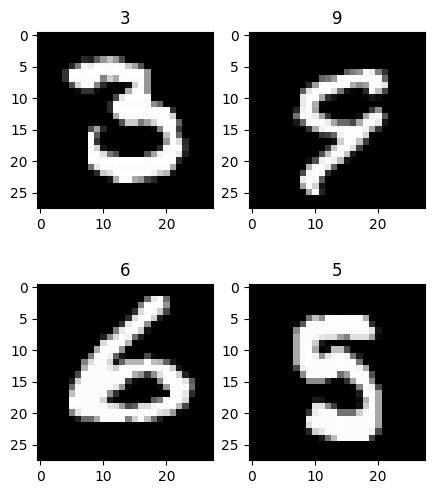

In [44]:
def dataReader(image_filename, label_filename, batch_size, drop_last=False):
    labels = readMatrixFromFile(label_filename)
    images = readMatrixFromFile(image_filename)
    batchnum = int(len(images) / batch_size)
    sample = list(range(len(images)))
    random.shuffle(sample)

    def batch_reader():
        # 每次迭代提供batch_size个样本
        for i in range(batchnum):
            # yield buff[i * batch_size:(i + 1) * batch_size]
            yield (images[sample[i*batch_size:i*batch_size+batch_size]],
                   labels[sample[i * batch_size:i * batch_size + batch_size]])

        if drop_last and len(images) % batch_size != 0:
            # yield buff[batchnum * batch_size:]
            yield (images[sample[i*batch_size:]],
                   labels[sample[i * batch_size:i]])
    return batch_reader()


def displayBatch(image_file, label_file, batch_size, drop_last=False):
    loader = dataReader(image_file, label_file, batch_size, drop_last)
    for i, data in enumerate(loader):
        # images, labels = zip(*data)
        images, labels = data
        displayImages(images, labels)
        if i > 3:
            break

if __name__ == '__main__':
    displayBatch('./t10k-images-idx3-ubyte','./t10k-labels-idx1-ubyte',4)
